In [252]:
import sys
print (sys.version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from itertools import chain
import math
%matplotlib inline

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]



# Project WP1-2
### code 2: Display, and group ports
<span style='font-family:"Times New Roman"'> <span styel=''> 
This code is used to group terminals by given radius (e.g., 100 nm), and to add extra features "Port" and "Region".
The working datset in this sheet is "PortList.csv";
### Basic steps: 
    a) Load data;
    b) 
    c) 
    d) 
    e) Save the cleaned dataset

###  Step a) : Load data, sort data, and display ports info in geographic map

In [154]:
df_ports=pd.read_csv("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/portsInfo.csv")
df_ports.sort_values(axis=0,by=["number of call all"],ascending=False,inplace=True)  # descend order !

print (df_ports.info())
print ("----------------------------------------------------------------------------------------------------------------------")
print ("The statistic information of portsInfor:\n")
print (df_ports.describe().T)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("The shape of portsInfo file:",df_ports.shape)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("The features names of portsInfor:\n",df_ports.columns.to_list())
print ("----------------------------------------------------------------------------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Terminal              3288 non-null   object 
 1   Country               3288 non-null   object 
 2   Lat                   3288 non-null   float64
 3   Lon                   3288 non-null   float64
 4   number of call start  3288 non-null   float64
 5   number of call end    3288 non-null   float64
 6   number of call all    3288 non-null   float64
dtypes: float64(5), object(2)
memory usage: 205.5+ KB
None
----------------------------------------------------------------------------------------------------------------------
The statistic information of portsInfor:

                       count        mean         std        min        25%  \
Lat                   3288.0   22.971758   25.946251  -53.27303   6.957058   
Lon                   3288.0   21.931035   78.278837 -171.7

In [155]:
df_ports.head()

,Terminal,Country,Lat,Lon,number of call start,number of call end,number of call all
0,Singapore,Singapore,1.20470,103.67232,7403.0,7365.0,14768.0
1,PTP Terminal,Russia,60.32058,28.72898,3785.0,3781.0,7566.0
2,Novorossiysk,Russia,44.72680,37.78154,3762.0,3762.0,7524.0
3,Yeosu,South Korea,34.71473,127.81125,3531.0,3547.0,7078.0
4,Houston,United States of America,29.23550,-94.62350,3371.0,3375.0,6746.0


### display ports data

In [156]:
def draw_map(m, scale=0.5):
    """
    plot backgroud map
    m: Basemap object
    scale: plot scale
    
    return: plot a backgroud map
    """
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    #m.bluemarble(scale=scale)  #Project NASA's blue marble image onto the map
    #m.drawcoastlines()
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def check_valsCount(df):
    """
    Check values counts in given dataframe
    return: counts of each column in given dataframe
    """
    cols=df.columns
    counts_all=[]
    for col in cols:
        counts=df.loc[:,col].value_counts()
        counts_all.append(counts)
        print (counts)
        print ('\n')
    return counts_all

Dutch Harbor                           1
Zorritos                               1
Escravos Terminal                      1
Ambarli                                1
Punta Gotay Terminal                   1
                                      ..
Longxue                                1
Durban Point Multi-Purpose Terminal    1
Kordin Grain Terminal                  1
Union Oil Terminal                     1
CUFL Jetty                             1
Name: Terminal, Length: 3288, dtype: int64


----------------------------------------------------------------------------------------------------------------------
No duplicate terminals any more !
----------------------------------------------------------------------------------------------------------------------
The respective minimum and maximum latitude and longitude coordiates of ports are: (-53.27303000000001, 76.55333, -171.7624, 179.36674)


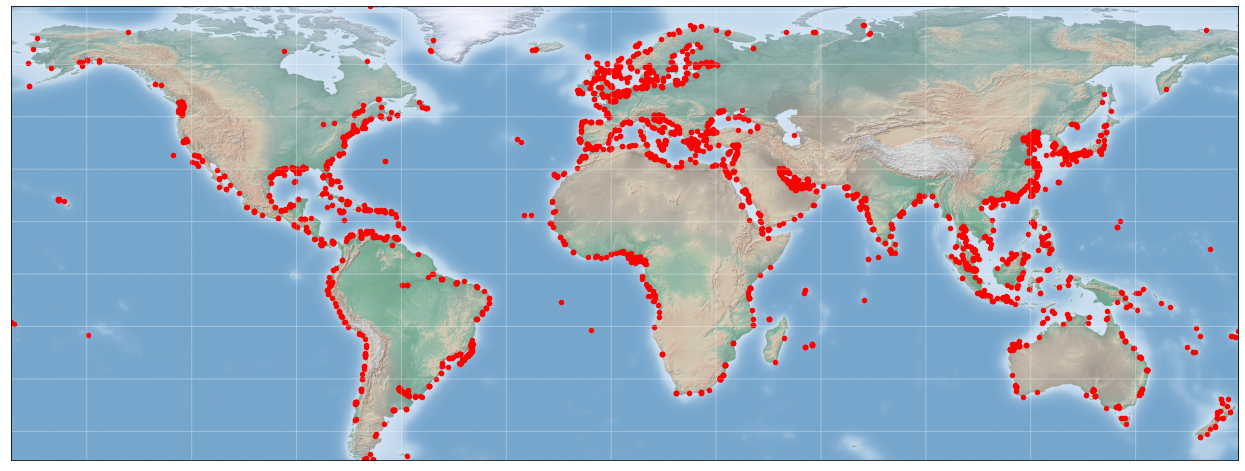

In [157]:
# Check terminal duplicates
df_terminal=pd.DataFrame(df_ports.Terminal)
counts_all=check_valsCount(df_terminal)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("No duplicate terminals any more !")
print ("----------------------------------------------------------------------------------------------------------------------")

# visulize original ports 
bbox=(df_ports.Lat.min(),df_ports.Lat.max(),df_ports.Lon.min(),df_ports.Lon.max())                                                        
print ("The respective minimum and maximum latitude and longitude coordiates of ports are:",bbox)

fig,ax=plt.subplots(figsize=(22,14))
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=bbox[0], urcrnrlat=bbox[1],
            llcrnrlon=bbox[2], urcrnrlon=bbox[3])
ax.scatter(df_ports.Lon,df_ports.Lat,zorder=1, alpha= 1, c='r', s=20)
draw_map(m)

ax.set_xlim(bbox[2],bbox[3]);
ax.set_ylim(bbox[0],bbox[1]);
fig.savefig("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/portsOriginal_1.png",dpi=400)

### Step b):  Calculate location distance, and group terminals

In [158]:
def dist(lat1,lat2,lon1,lon2):
    """
    compute the great-circle distance between two locations on earth.
    lat1,lon1: location information of location 1; in degrees
    lat2,lon2: location information of location 2; in degrees
    
    return: numeric; distance, in km
    """ 
    from math import radians, cos, sin, asin,sqrt
    R=6371  # km
    
    #  turn to radias
    lon1=radians(lon1) 
    lon2=radians(lon2)
    lat1=radians(lat1)
    lat2=radians(lat2)
    
    # Haversine formula
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    
    c = 2 * asin(sqrt(a))
    d=R*c # km
    return d

def similar_terminal(df, ix1, lat1, lon1,dist_ref=100 * 1.852):
    """
    Given a location (ix1,lat1, lon1), compute the distance between this single location and all other locations in dataframe.
    Then, extract all the ids of similar terminals when dist is not larger than dist_ref.
    
    df:dataFrame
    ix1,lat1,lon1: index of each row, latitude, longitude
    dist_ref: reference distance,the default is 185.2km
    return:ids dict; terminals dict
    """
    similars_ids_single = {}
    similars_terminals_single = {}

    # remove the original location itself
    #df_update = df.drop([ix1], axis=0)

    # loop to find the suitable ids
    for ix2, lat2, lon2 in zip(df.index, df.Lat, df.Lon):
        dist_temp = dist(lat1, lat2, lon1, lon2)
        if dist_temp <= dist_ref:
            similars_ids_single.setdefault(ix1, []).append(ix2)
            similars_terminals_single.setdefault(df.loc[ix1, 'Terminal'], []).append(df.loc[ix2, 'Terminal'])

    if (similars_ids_single=={}) or (similars_terminals_single=={}):
        return "No",ix1,similars_ids_single, similars_terminals_single
    else:
        return "Yes",ix1,similars_ids_single, similars_terminals_single

def similar_terminals(df):
    """
    compute all similar terminals, given a dataframe
    Add them into a dictionary for further utilization.
    
    return: lists including all similar terminals for every terminal in given dataframe, and lists of terminals without similars
    """
    similars_ids_all = []
    similars_terminals_all = []
    noSimilars_terminals=[]


    for id1, lat1, lon1 in zip(df.index, df.Lat, df.Lon):
        flag,temp_ix,temp_id, temp_terminals = similar_terminal(df, id1, lat1, lon1)
        if flag=="No"or len(list(temp_terminals.values())[0])==1:
            noSimilars_terminals.append(temp_ix)
        else:  
            similars_ids_all.append(temp_id)
            similars_terminals_all.append(temp_terminals)

    return similars_ids_all, similars_terminals_all,noSimilars_terminals

def listToDict(list1):
    # swith a list to a dict
    # to dicts
    dicts={}
    for ix,elem in enumerate(list1):
        dicts.update(elem)
    return dicts

# # test case for dist() function
# lat1,lat2=53.32055555555556,53.31861111111111
# long1,long2=-1.7297222222222221,-1.6997222222222223
# d=dist(lat1,lat2,long1,long2)
# print (d)

In [159]:
# test case for similar_terminal()
print ("Test case for similar terminal()")
_,_,similars_ids_single,similars_terminals_single=similar_terminal(df_ports,1231,-52.81843,-68.16315)
print (df_ports[df_ports.Terminal=="Rio Cullen"])
print ("----------------------------------------------------------------------------------------------------------------------")
print ("the similar terminals ids as terminal 'Rio Cullen' id:",similars_ids_single)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("the similar terminals as terminal 'Rio Cullen':",similars_terminals_single)

# compute all similar termilars in df_ports
similars_ids_all,similars_terminals_all,nosimilars_all=similar_terminals(df_ports)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("The name of all similar terminals (first 1 item):\n",similars_terminals_all[:1])
print ("----------------------------------------------------------------------------------------------------------------------")
print ("the ids of all the similar terminals (first 1 item):\n",similars_ids_all[:1])
print ("----------------------------------------------------------------------------------------------------------------------")
print ("the ids of all the terminals without similars:\n",nosimilars_all)
print ("----------------------------------------------------------------------------------------------------------------------")
print ("the length of terminals with similars:",len(similars_ids_all))
print ("the length of terminals without similars:",len(nosimilars_all))

Test case for similar terminal()
        Terminal    Country       Lat       Lon  number of call start  \
1231  Rio Cullen  Argentina -52.81843 -68.16315                  57.0   

      number of call end  number of call all  
1231                56.0               113.0  
----------------------------------------------------------------------------------------------------------------------
the similar terminals ids as terminal 'Rio Cullen' id: {1231: [1231, 1556, 1687, 1897, 1934]}
----------------------------------------------------------------------------------------------------------------------
the similar terminals as terminal 'Rio Cullen': {'Rio Cullen': ['Rio Cullen', 'San Sebastian', 'Puerto Sara', 'Cabo Negro Gas Terminal', 'Punta Loyola']}
----------------------------------------------------------------------------------------------------------------------
The name of all similar terminals (first 1 item):
 [{'Singapore': ['Singapore', 'Oiltanking Singapore Terminal', 'Univers

### Step c): Group terminals and assign a common name for each group

In [234]:
def groupSame(df,portCommon="Rio Cullen",group_id=[1231,1556, 1687, 1897, 1934],sortValue="number of call all"):
    """
    Group dataframe with given idx, and sort it in a descend way.
    sorted the dataframe by sortValue in a descend way
    
    df: dataframe
    portCommon: string, terminal used as the common port name of a group of close terminals
    group_id: list; index of all the similar terminals,including portCommon itself. 
    sortValue: string, used for sorting of dataframe
    """
    df_similar=df_ports.loc[group_id]
    df_similar.sort_values(axis=0,by=[sortValue],ascending=False,inplace=True)
    return df_similar


In [164]:
dic=listToDict(similars_terminals_all)
print (len(similars_terminals_all))
print (dic)

3194
{'Singapore': ['Singapore', 'Oiltanking Singapore Terminal', 'Universal Oil Terminal', 'ExxonMobil Terminal', 'Vopak Sebarok Terminal', 'Tanjung Bin', 'Vopak Banyan Terminal', 'Pulau Busing Terminal', 'Horizon Singapore Terminal', 'TLP Liquid Cargo Terminal', 'Pulau Bukom Refinery', 'Pengerang Deepwater Terminal', 'SRC Terminal', 'Pasir Gudang Edible Oil Terminal', 'Tanjung Pelepas', 'Seraya Power Station Terminal', 'Pasir Gudang Non-Edible Liquid Terminal', 'Oiltanking Helios Terminal', 'Vopak Sakra Terminal', 'Vopak Penjuru Terminal', 'Tanjung Uban', 'ExxonMobil Aromatics Terminal', 'SPC Terminal', 'Oiltanking Karimun Terminal', 'Tomakomai Minami Terminal', 'Kabil', 'Chevron Oronite Terminal', 'Stolthaven Terminal', 'Sembawang', 'Pasir Gudang Break Bulk Terminal', 'Pulau Sambu', 'Tuas Boulevard Shipyard', 'Karimun Besar', 'Keppel Singmarine', 'Batam', 'Keppel FELS', 'Malaysia Marine and Heavy Engineering', 'PaxOcean Singapore', 'Sungai Pakning', 'ASL Marine', 'Pasir Panjang Cont

In [248]:
def findUnion(list1,list2):
    """
    find union of list1 and list2, as long as only element from list1 is also in list2
    list1,list2: list
    return: union list, or list1
    """
    
    if list1 == [] or list2== []:
        return 
    union=list1
    for elem in list1:
        if elem in list2:
            union.extend(list2)
        break
    return union


def findGroups_union(similar_List):
    """
    There are overlapping terminals in differet terminal groups.
    Find the lagest group containing all similar terminals.
    Note that, the input list should be in descending order (based on the number of calls)
    
    similar_List: list, containing all similar terminals.
    return: dict, containing similar terminals 
    """
    
    similar_Dict=listToDict(similar_List)
    similar_DictC=similar_Dict.copy()  
    
    terminals_all=list(similar_DictC.keys()) #  all terminals list, sorted by "number of call all"
    leng=len(terminals_all)
    
    clean_terminals={}
    
    for j in range(leng):
        
        mains=list(similar_List[j].keys())[0] # main terminal
        main_similars=list(similar_List[j].values())[0] # list, similar terminals from main terminal
        
        for terminal in main_similars:
            if terminal in similar_Dict.keys():
                main_similars.extend(list(similar_Dict.values())[0])
                main_similars=list(set(main_similars))
        clean_terminals.update({mains:main_similars})
        
    return clean_terminals

def findGroups_intersection():
    

In [249]:
clean_terminals=findGroups_union(similars_terminals_all)

KeyboardInterrupt: 

In [ ]:
print (clean_terminals)

In [219]:
dic3={1:[1,2,3]}
print (list(dic3.values())[0])

[1, 2, 3]


In [255]:
df_gang=pd.ExcelFile("C:/posDoc-SDU-Denmark/SDU_research/shippingLabwp1/PortList.xlsx")
df_gang=df_gang.parse(header=0,index_col=0)

In [256]:
df_gang.head()

,Country,Terminal,Port Group,Region,Lat,Lon,num of calls
index,,,,,,,
6,Argentina,Rio Cullen,Rio Cullen,East Sou.Ame,-52.804410,-68.208910,56
13,Argentina,Punta Loyola,Rio Cullen,East Sou.Ame,-51.606985,-69.019225,14
17,New Zealand,Dunedin,Bluff,Oceania,-45.875160,170.519330,26
18,Argentina,Comodoro Rivadavia,Caleta Cordova,East Sou.Ame,-45.860180,-67.389045,40
19,Argentina,Caleta Cordova,Caleta Cordova,East Sou.Ame,-45.773050,-67.320400,447


In [258]:
df_gang.Region.value_counts()

SE Asica           288
NE Asia            257
Mediterranean      257
Gulf               191
East Sou.Ame       180
English Channel    158
Baltic             150
North sea          142
Caribbean          140
Oceania            133
South Asia         132
East Nor.Ame       128
Mid. East          118
East Asia          114
Black Sea          107
SW Africa           89
Arctic              83
East Africa         82
SW Europe           76
Red sea             73
West Nor.Ame        67
West Sou.Ame        56
West Latin          47
West Africa         29
Name: Region, dtype: int64